# Nikhil Desai

**The Sparks Foundations Under GRIP:**

**Task - 1 Predictions using Supervised ML:-**

# Importing required libraries:

In [402]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

plt.rcParams['figure.figsize'] = 15,8

#For Warnings
import warnings
warnings.filterwarnings('ignore')

# Load Data:

In [403]:
df = pd.read_csv('Data.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Missing Values:

In [405]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

**As,we can see there are no missing values present**

In [406]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


# EDA:

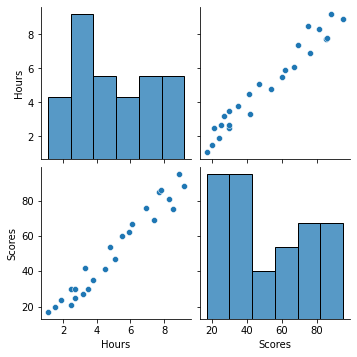

In [407]:
sns.pairplot(df)

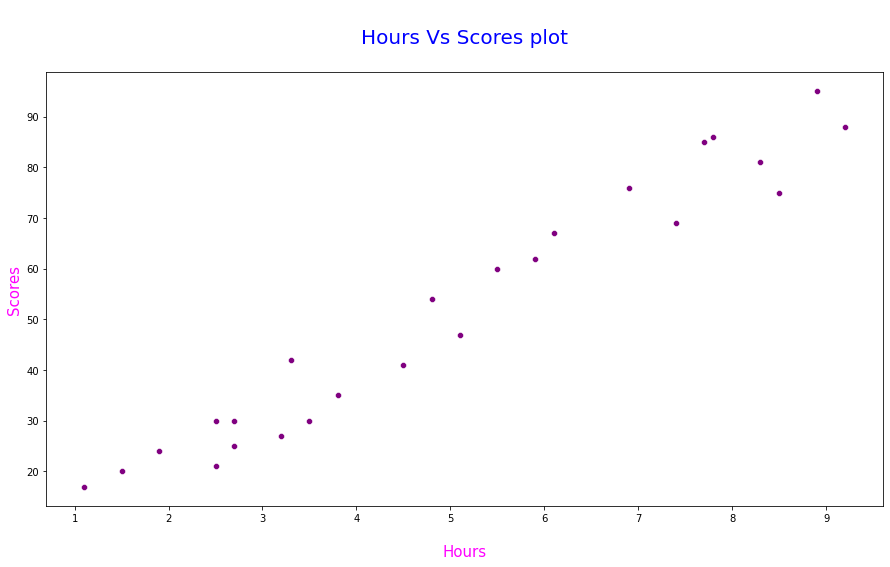

In [408]:
ax = sns.scatterplot(x = 'Hours',y = 'Scores',data = df,color = 'purple')
ax.set_xlabel('\nHours',size = 15,color = 'magenta')
ax.set_ylabel('Scores',size = 15,color = 'magenta')
ax.set_title("\nHours Vs Scores plot\n",size = 20,color = 'blue')
plt.show()

> **As we can see from the graph that the more number of hours study you do the more scores you will get.** 

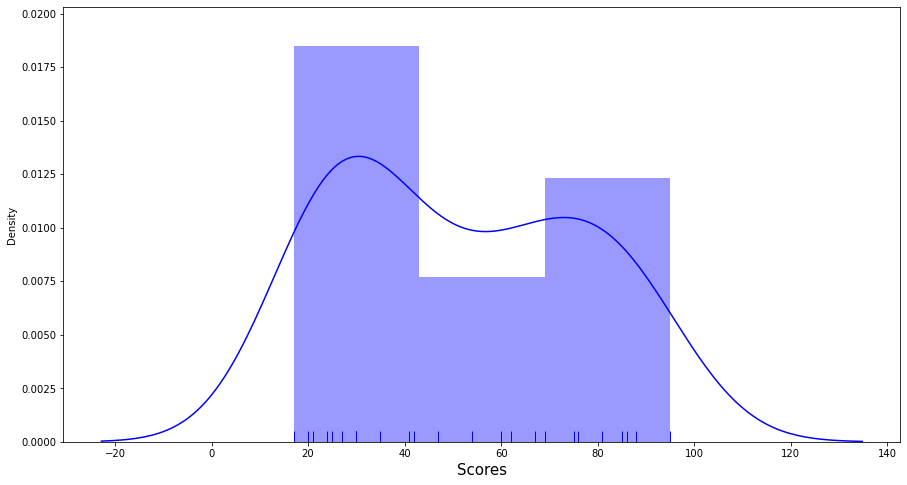

In [409]:
sns.distplot(df['Scores'],color = 'b',rug=True)
plt.xlabel('Scores',size = 15)
plt.show()

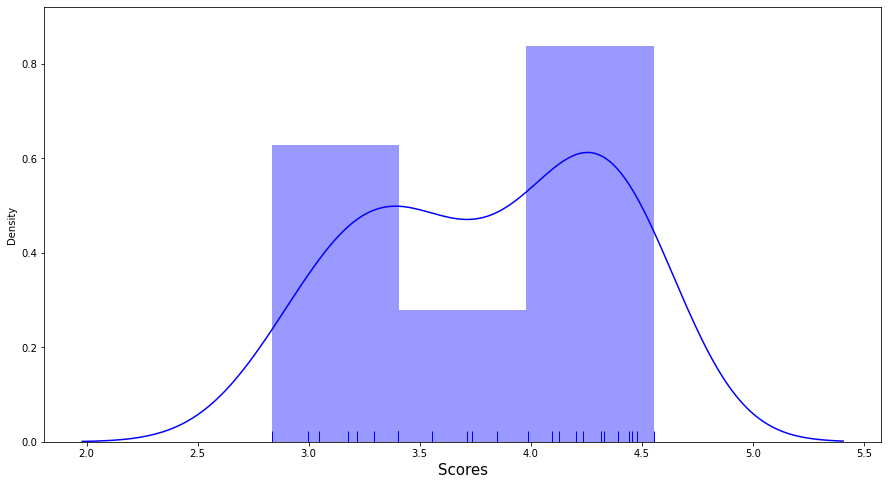

In [410]:
sns.distplot(np.log(df['Scores']),color = 'b',rug=True)
plt.xlabel('Scores',size = 15)
plt.show()

# Outliers:

<AxesSubplot:>

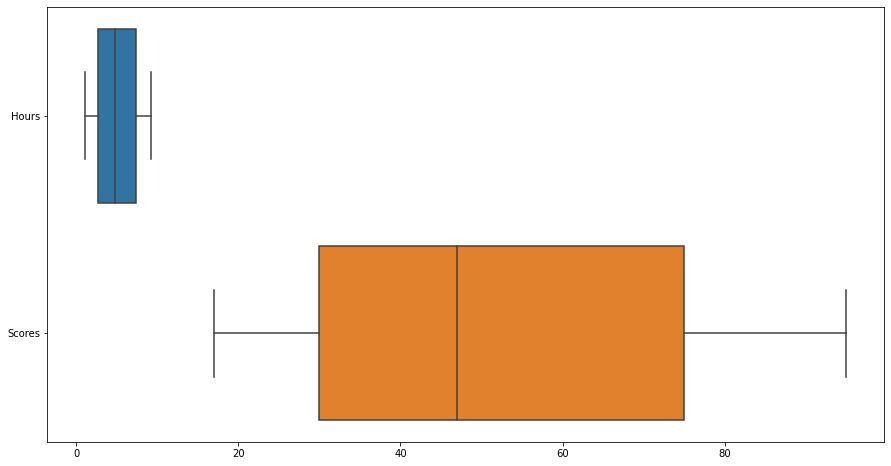

In [411]:
sns.boxplot(data = df,orient='h')

**No Outliers presents so we are good to split the data**

In [412]:
X = df.iloc[:,:1].values
y = df.iloc[:,1].values

**Fit the Data into ML Model:**

In [413]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 10)

In [414]:
print('Shape of X_train:',X_train.shape)
print('Shape of X_test:',X_test.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of y_test:',y_test.shape)

Shape of X_train: (20, 1)
Shape of X_test: (5, 1)
Shape of y_train: (20,)
Shape of y_test: (5,)


In [415]:
X_train

array([[7.4],
       [1.1],
       [5.5],
       [5.9],
       [3.8],
       [8.5],
       [6.9],
       [9.2],
       [6.1],
       [7.7],
       [4.8],
       [7.8],
       [8.3],
       [2.7],
       [2.5],
       [1.9],
       [2.5],
       [8.9],
       [3.5],
       [2.7]])

In [416]:
y_train

array([69, 17, 60, 62, 35, 75, 76, 88, 67, 85, 54, 86, 81, 30, 30, 24, 21,
       95, 30, 25], dtype=int64)

# Model Build:  

In [417]:
# Using Simple Linear Regression 

lr = LinearRegression().fit(X_train,y_train)

In [418]:
lr.score(X_train,y_train)*100

95.807022445042

In [419]:
lr.score(X_test,y_test)*100

66.83995499740195

**We are getting good score on both the data**

In [420]:
lr.coef_

array([9.81430544])

In [421]:
lr.intercept_

2.6499651894038863

In [422]:
predict = lr.predict(X_test)
predict

array([17.37142335, 52.70292295, 35.03717315, 34.05574261, 46.81433968])

**Checking Errors:**

In [423]:
print("Mean Absolute Error:",mean_absolute_error(y_test,predict))
print("Mean Squared Error:",mean_squared_error(y_test,predict))
print("Root Mean Squared Error:",mean_squared_error(y_test,predict,squared=False))

Mean Absolute Error: 5.632881746692995
Mean Squared Error: 34.300750550687425
Root Mean Squared Error: 5.856684262506168


**Now, Lets put the input value into model**

In [424]:
prediction = lr.predict([[9.25]])  # Always,predict input value in 2-D array.

print("If a Student Studies 9.25 hours/day then He'll get {}% Score.".format(round(prediction[0],2)))

If a Student Studies 9.25 hours/day then He'll get 93.43% Score.


# Thank you for watching.